<a href="https://colab.research.google.com/github/Tanay-8358/Mini-Project/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Temporarily unzipping Data
from google.colab import drive
import zipfile
import os
import shutil

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Step 2: Define paths
zip_path = "/content/drive/MyDrive/Tanay Salve/Main_project_06022025/data/archive (1).zip"

# Temporary extraction path in Colab (much faster)
temp_extract_path = "/content/dataset_temp"

# Final destination in Google Drive
dataset_name = os.path.splitext(os.path.basename(zip_path))[0]  # Extract dataset name
final_extract_path = f"/content/drive/MyDrive/Tanay Salve/Main_project_06022025/datasets"

# Step 3: Unzip in Colab (Fast)
print("Unzipping file (fast method)...")
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(temp_extract_path)

print(f"✅ Extracted temporarily to: {temp_extract_path}")

Mounted at /content/drive
Unzipping file (fast method)...
✅ Extracted temporarily to: /content/dataset_temp


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report

# ======== GPU Setup ========
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("GPU is available ✅")
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)  # optional: prevent TensorFlow from grabbing all GPU memory
    except RuntimeError as e:
        print(e)
else:
    print("GPU not available ❌, running on CPU.")

# Set your paths (modify these according to your Google Drive structure)
train_path = '/content/dataset_temp/train'
test_path = '/content/dataset_temp/test'

# ======== Image settings ========
img_height = 128
img_width = 128
batch_size = 32

# ======== Data generators ========
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

test_data = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# ======== Build simple CNN ========
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# ======== Compile model ========
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# ======== Train model ========
history = model.fit(
    train_data,
    epochs=10,
    validation_data=test_data
)


GPU is available ✅
Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3125/3125 ━━━━━━━━━━━━━━━━━━━━ 78s 24ms/step - accuracy: 0.8178 - loss: 0.3952 - val_accuracy: 0.9084 - val_loss: 0.2276
Epoch 2/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 69s 22ms/step - accuracy: 0.9129 - loss: 0.2183 - val_accuracy: 0.9211 - val_loss: 0.1993
Epoch 3/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 80s 26ms/step - accuracy: 0.9308 - loss: 0.1786 - val_accuracy: 0.9291 - val_loss: 0.1835
Epoch 4/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 76s 24ms/step - accuracy: 0.9439 - loss: 0.1469 - val_accuracy: 0.9286 - val_loss: 0.1887
Epoch 5/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 78s 25ms/step - accuracy: 0.9544 - loss: 0.1188 - val_accuracy: 0.9279 - val_loss: 0.1959
Epoch 6/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 74s 24ms/step - accuracy: 0.9621 - loss: 0.1005 - val_accuracy: 0.9255 - val_loss: 0.2336
Epoch 7/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 76s 24ms/step - accuracy: 0.9684 - loss: 0.0829 - val_accuracy: 0.9310 - val_loss: 0.2551
Epoch 8/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 77s 25ms/step - accuracy: 0.9707 - loss: 0.07

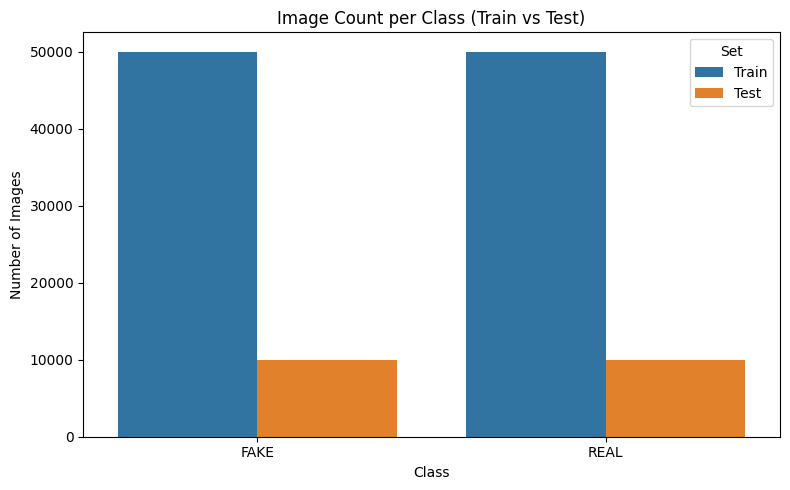

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

# ======== Count images in train and test folders per class ========
def count_images(directory):
    class_counts = {}
    for class_dir in os.listdir(directory):
        class_path = os.path.join(directory, class_dir)
        if os.path.isdir(class_path):
            class_counts[class_dir] = len(os.listdir(class_path))
    return class_counts

train_counts = count_images(train_path)
test_counts = count_images(test_path)

# ======== Combine counts into a DataFrame ========
import pandas as pd
df_counts = pd.DataFrame({
    'Set': ['Train'] * len(train_counts) + ['Test'] * len(test_counts),
    'Class': list(train_counts.keys()) + list(test_counts.keys()),
    'Count': list(train_counts.values()) + list(test_counts.values())
})

# ======== Barplot ========
plt.figure(figsize=(8, 5))
sns.barplot(data=df_counts, x='Class', y='Count', hue='Set')
plt.title('Image Count per Class (Train vs Test)')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.tight_layout()
plt.show()


In [ ]:
# ======== Evaluate model ========
loss, accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {accuracy*100:.2f}%")

# ======== Predict and classification report ========
y_pred = model.predict(test_data)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()
y_true = test_data.classes

print(classification_report(y_true, y_pred_classes, target_names=["REAL", "FAKE"]))


625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9256 - loss: 0.2461
Test Accuracy: 93.68%
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step
              precision    recall  f1-score   support

        REAL       0.95      0.92      0.94     10000
        FAKE       0.92      0.95      0.94     10000

    accuracy                           0.94     20000
   macro avg       0.94      0.94      0.94     20000
weighted avg       0.94      0.94      0.94     20000



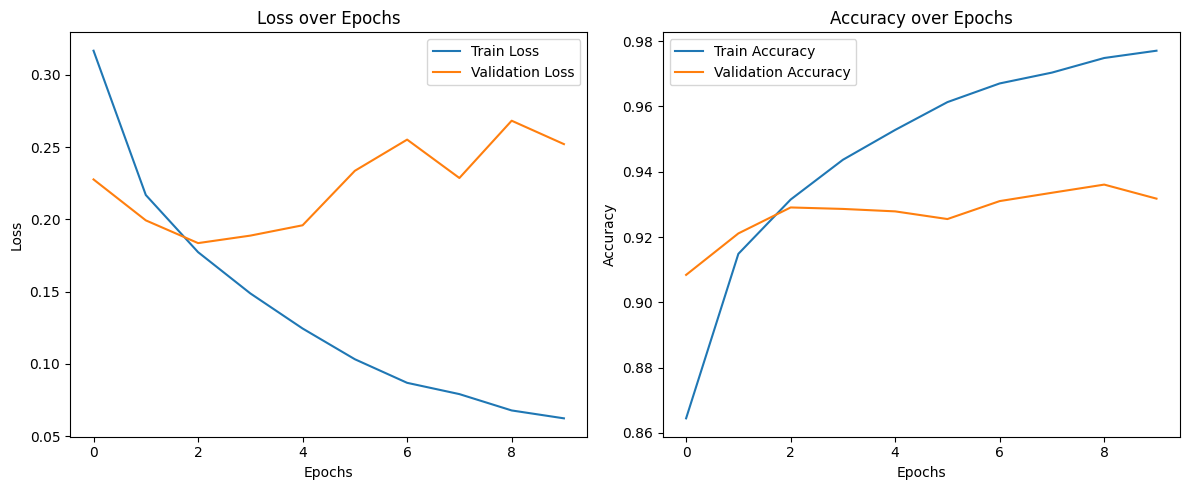

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc

# ======== 1. Plotting Training vs Validation Loss and Accuracy ========
history = model.history

#print(history.history.keys())
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


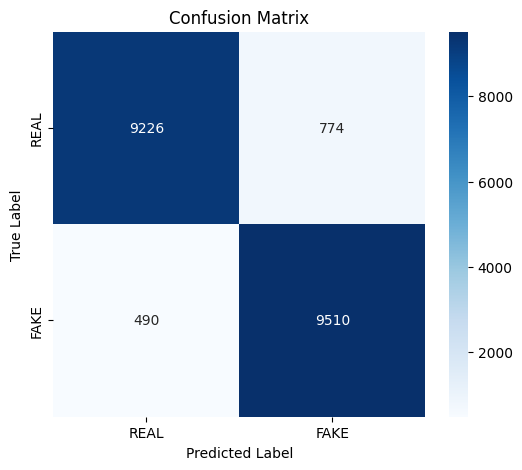

In [ ]:
# ======== 2. Confusion Matrix ========
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["REAL", "FAKE"], yticklabels=["REAL", "FAKE"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

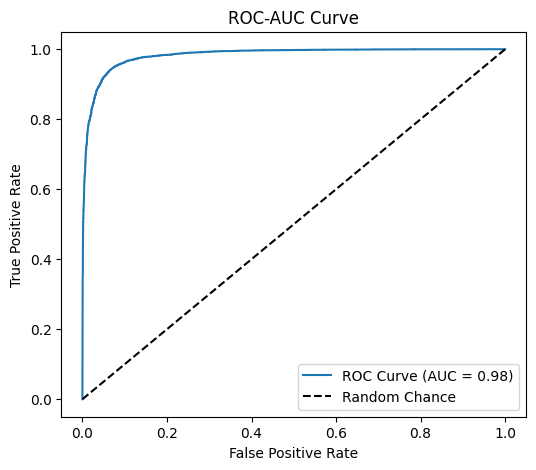

In [ ]:
# ======== 4. ROC-AUC Curve ========
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend()
plt.show()

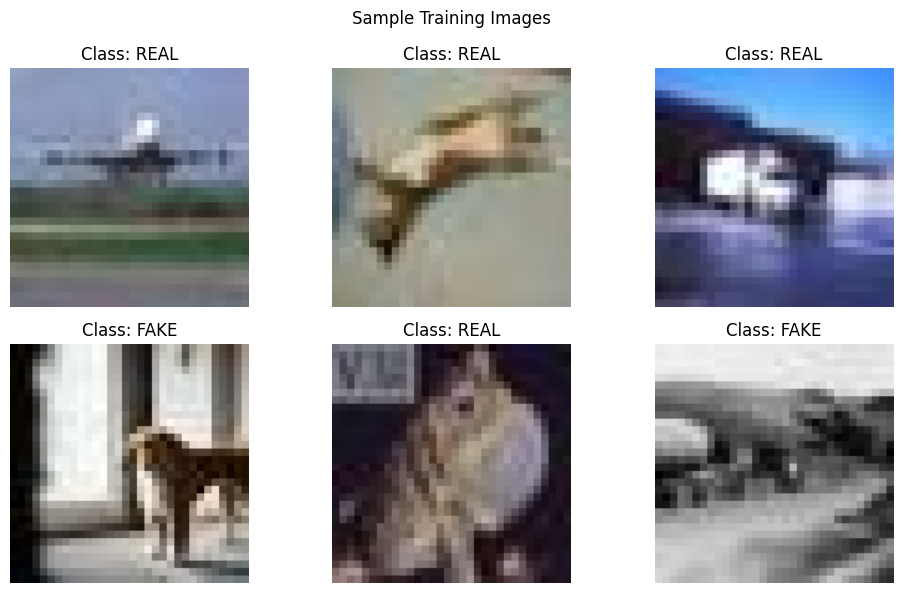

In [ ]:
# ======== 5. Visualize Sample Data from Each Class ========
class_names = list(train_data.class_indices.keys())

plt.figure(figsize=(10, 6))
for i in range(6):
    img_batch, label_batch = next(train_data)  # ✅ Correct way to get the next batch
    img = img_batch[0]
    label = label_batch[0]

    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.title(f"Class: {class_names[int(label)]}")
    plt.axis('off')

plt.suptitle("Sample Training Images")
plt.tight_layout()
plt.show()
